## In this python code, we will find out Pearson's Correlation Coefficient of the features for multi-collinearity problem.

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## Choosing the dataset
#### For the chosen dataset, corresponding topic names are written for better understanding of results.
Data used: Output pickles of Sentiment Analysis

In [2]:
dataset = 2
if dataset == 1:
    pickle_file = open("dataOCM/sentiment_score_reviews_113759.data",'rb')
    pickle_data = pickle.load(pickle_file)
    df = pd.DataFrame(pickle_data)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 120)
    df=df[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'RverMonthYear', 'RverRecom', 'score101', 'RverPosition', 'RvScore', 'RvScoreWorkAtmosphere', 'RvScoreCohesionAmongColleagues', 'RvScoreEqualRights', 'RvScoreDealingWithOlderColleagues', 'RvScoreEnvironmentalSocialAwareness', 'RvScoreWorkLifeBalance']].copy()
    print(df.shape)        
    #df.rename(columns={"topic0":"bad companies", "topic1":"job pressure", "topic2":"work atmosphere - interesting tasks", "topic3":"cohesion among colleagues", "topic4":"treatment of colleagues", "topic5":"equal rights", "topic6":"work life balance", "topic7":"treatment of leader", "topic8":"communication in the organization", "topic9":"flexible work hours", "topic10":"circumstances at work - overtime", "topic11":"age diversity", "topic12":"vacation", "topic13":"work from home", "topic14":"good management", "topic15":"work hours", "topic16":"work atmosphere", "topic17":"work atmosphere for new colleagues", "featureYear":"Year", "featureRecom":"Recommendation", "featureSentiScorenormalized":"Sentiment Score Normalized", "PreviousVsCurrentFlag":"Previous or Current Employee", "RvScoreScaled":"Overall Rating", "RvScoreWorkAtmosphereScaled":"Work Atmosphere", "RvScoreCohesionAmongColleaguesScaled":"Cohesion Among Colleagues", "RvScoreEqualRightsScaled":"Equal Rights", "RvScoreDealingWithOlderColleaguesScaled":"Dealing With Older Colleagues", "RvScoreEnvironmentalSocialAwarenessScaled":"Environmental Social Awareness", "RvScoreWorkLifeBalanceScaled":"Work Life Balance" }, inplace=True)
elif dataset == 2:
    pickle_file = open("dataOCM/sentiment_score_reviews_083631.data",'rb')
    pickle_data = pickle.load(pickle_file)
    df = pd.DataFrame(pickle_data)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 120)
    topics=[]
    #for i in range(23):
    #    topics.append('topic'+str(i))
    #print(topics)
    #df=df[topics, ['RverMonthYear', 'RverRecom', 'score101', 'RverPosition', 'RvScore', 'RvScoreWorkAtmosphere', 'RvScoreCohesionAmongColleagues', 'RvScoreEqualRights', 'RvScoreDealingWithOlderColleagues', 'RvScoreEnvironmentalSocialAwareness', 'RvScoreWorkLifeBalance']]
    df=df[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19', 'topic21', 'RverMonthYear', 'RverRecom', 'score101', 'RverPosition', 'RvScore', 'RvScoreWorkAtmosphere', 'RvScoreCohesionAmongColleagues', 'RvScoreEqualRights', 'RvScoreDealingWithOlderColleagues', 'RvScoreEnvironmentalSocialAwareness', 'RvScoreWorkLifeBalance']].copy()
    #df.rename(columns={"topic0":"relationships with colleagues and bosses", "topic1":"satisfaction with work and colleagues", "topic2":"work hours", "topic3":"great education", "topic4":"gender diversity", "topic5":"cultural diversity", "topic6":"overtime, job pressure", "topic7":"work life balance", "topic8":"women empowerment", "topic9":"appreciation of experience", "topic10":"age diversity", "topic11":"cohesion among colleagues", "topic13":"cohesion among new colleagues", "topic14":"fun environment", "topic15":"young team", "topic16":"communication in the organisation", "topic17":"work from home", "topic18":"bad salary", "topic19":"tasks at work", "topic21":"female leaders", "featureYear":"Year", "featureRecom":"Recommendation", "featureSentiScorenormalized":"Sentiment Score Normalized", "PreviousVsCurrentFlag":"Previous or Current Employee", "RvScoreScaled":"Overall Rating", "RvScoreWorkAtmosphereScaled":"Work Atmosphere", "RvScoreCohesionAmongColleaguesScaled":"Cohesion Among Colleagues", "RvScoreEqualRightsScaled":"Equal Rights", "RvScoreDealingWithOlderColleaguesScaled":"Dealing With Older Colleagues", "RvScoreEnvironmentalSocialAwarenessScaled":"Environmental Social Awareness", "RvScoreWorkLifeBalanceScaled":"Work Life Balance" }, inplace=True)
    print(df.shape)
#print(topics)
#df.drop(['Mean_value'], inplace=True, axis=1)
df.head(2)

(7062, 31)


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,RverMonthYear,RverRecom,score101,RverPosition,RvScore,RvScoreWorkAtmosphere,RvScoreCohesionAmongColleagues,RvScoreEqualRights,RvScoreDealingWithOlderColleagues,RvScoreEnvironmentalSocialAwareness,RvScoreWorkLifeBalance
1,0,0.0719539,0,0,0,0,0,0.227733,0.0718945,0,0,0,0,0,0,0.112077,0.137255,0,0.0718944,0,May 2020,Empfohlen,2.9287,Angestellte/r oder Arbeiter/in,4.5,5,5,,5,,4
2,0,0,0.111966,0,0,0,0.0791194,0,0.0769237,0.0865086,0.279106,0,0,0.0766401,0,0,0,0,0.177839,0,October 2019,Nicht empfohlen,0.2452,Ex-Angestellte/r oder Arbeiter/in,3.2,3,3,3,4,2,3


#### Checking the contents of dataframe

In [3]:
df.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,RverMonthYear,RverRecom,score101,RverPosition,RvScore,RvScoreWorkAtmosphere,RvScoreCohesionAmongColleagues,RvScoreEqualRights,RvScoreDealingWithOlderColleagues,RvScoreEnvironmentalSocialAwareness,RvScoreWorkLifeBalance
1,0,0.0719539,0,0,0,0,0,0.227733,0.0718945,0,0,0,0,0,0,0.112077,0.137255,0,0.0718944,0,May 2020,Empfohlen,2.9287,Angestellte/r oder Arbeiter/in,4.5,5,5,,5,,4
2,0,0,0.111966,0,0,0,0.0791194,0,0.0769237,0.0865086,0.279106,0,0,0.0766401,0,0,0,0,0.177839,0,October 2019,Nicht empfohlen,0.2452,Ex-Angestellte/r oder Arbeiter/in,3.2,3,3,3,4,2,3
3,0.0107534,0.010753,0.0107565,0.225807,0.0107529,0.11828,0.0107529,0.0107527,0.0107542,0.010755,0.440842,0.0107528,0.0107536,0.0107528,0.0107527,0.0107555,0.0107544,0.0107529,0.0107528,0.0107527,October 2019,Empfohlen,0.1062,Führungskraft / Management,4.8,5,5,5,5,5,4


## Data cleaning
Making it suitable for regression and for calculation of pearson's correlation 
- Convert Month-Year to Year
- Recommended and Non-Recommended to 1 and 0 respectively
- From RverPosition, Extract 2 columns.
- - Previous or Current Employee
- - Position in Organization(Later will be one-hot-encoded)
- Convert all features in float
- Normalize all the features 

In [4]:
# Convert Month-Year to Year
df['Year']=df.RverMonthYear.str.extract(r'\b(\w+)$', expand=True)
df['Year'].value_counts()
df.drop(columns=['RverMonthYear'], inplace=True)
df.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,RverRecom,score101,RverPosition,RvScore,RvScoreWorkAtmosphere,RvScoreCohesionAmongColleagues,RvScoreEqualRights,RvScoreDealingWithOlderColleagues,RvScoreEnvironmentalSocialAwareness,RvScoreWorkLifeBalance,Year
1,0,0.0719539,0,0,0,0,0,0.227733,0.0718945,0,0,0,0,0,0,0.112077,0.137255,0,0.0718944,0,Empfohlen,2.9287,Angestellte/r oder Arbeiter/in,4.5,5,5,,5,,4,2020
2,0,0,0.111966,0,0,0,0.0791194,0,0.0769237,0.0865086,0.279106,0,0,0.0766401,0,0,0,0,0.177839,0,Nicht empfohlen,0.2452,Ex-Angestellte/r oder Arbeiter/in,3.2,3,3,3,4,2,3,2019
3,0.0107534,0.010753,0.0107565,0.225807,0.0107529,0.11828,0.0107529,0.0107527,0.0107542,0.010755,0.440842,0.0107528,0.0107536,0.0107528,0.0107527,0.0107555,0.0107544,0.0107529,0.0107528,0.0107527,Empfohlen,0.1062,Führungskraft / Management,4.8,5,5,5,5,5,4,2019


#### Method to encode Reviewer Recommendation between 0 and 1

In [5]:
def recomEncoding(val):
    if val == 'Empfohlen':
        return 1
    elif val == 'Nicht empfohlen':
        return 0
    else:
        return 0.5

    
df['Recommendation'] = df['RverRecom'].apply(recomEncoding)
df.drop(columns=['RverRecom'], inplace=True)
df.head(3)
df['Recommendation'].value_counts()

1.0    3497
0.0    2564
0.5    1001
Name: Recommendation, dtype: int64

#### One Hot Encoding of employees based on Employee type
- Employee
- Management
- Qualification
- TemporaryEmployed

In [6]:
conditions = [(df["RverPosition"] == 'Angestellte/r oder Arbeiter/in'),
              (df["RverPosition"] == 'Ex-Angestellte/r oder Arbeiter/in'),
              (df["RverPosition"] ==  'Führungskraft / Management'),
              (df["RverPosition"] == 'Ex-Führungskraft / Management'),
              (df["RverPosition"] == 'Auszubildende/r'),
              (df["RverPosition"] == 'Ex-Zeitarbeiter/in'),
              (df["RverPosition"] == 'Ex-Praktikant/in'),
              (df["RverPosition"] == 'Zeitarbeiter/in'),
              (df["RverPosition"] == 'Werkstudent/in'),
              (df["RverPosition"] == 'Ex-Werkstudent/in'),
              (df["RverPosition"] == 'Ex-Freelancer'),
              (df["RverPosition"] == 'Ex-Auszubildende/r'),
              (df["RverPosition"] == 'Freelancer'),
              (df["RverPosition"] == 'Praktikant/in')
              ]
choices_NewRverCategory = ['Employee', 'Employee', 'Management', 'Management', 'Qualification', 'TemporaryEmployed',
           'Qualification', 'TemporaryEmployed', 'Qualification', 'Qualification', 'TemporaryEmployed',
           'Qualification', 'TemporaryEmployed', 'Qualification']

df["NewRverPosition"] = np.select(conditions, choices_NewRverCategory, default='NaN')
one_hot = pd.get_dummies(df['NewRverPosition'], prefix="One_Hot_Position")
# # Join the encoded df
df = df.join(one_hot)
df.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,score101,RverPosition,RvScore,RvScoreWorkAtmosphere,RvScoreCohesionAmongColleagues,RvScoreEqualRights,RvScoreDealingWithOlderColleagues,RvScoreEnvironmentalSocialAwareness,RvScoreWorkLifeBalance,Year,Recommendation,NewRverPosition,One_Hot_Position_Employee,One_Hot_Position_Management,One_Hot_Position_Qualification,One_Hot_Position_TemporaryEmployed
1,0,0.0719539,0,0,0,0,0,0.227733,0.0718945,0,0,0,0,0,0,0.112077,0.137255,0,0.0718944,0,2.9287,Angestellte/r oder Arbeiter/in,4.5,5,5,,5,,4,2020,1.0,Employee,1,0,0,0
2,0,0,0.111966,0,0,0,0.0791194,0,0.0769237,0.0865086,0.279106,0,0,0.0766401,0,0,0,0,0.177839,0,0.2452,Ex-Angestellte/r oder Arbeiter/in,3.2,3,3,3,4,2,3,2019,0.0,Employee,1,0,0,0
3,0.0107534,0.010753,0.0107565,0.225807,0.0107529,0.11828,0.0107529,0.0107527,0.0107542,0.010755,0.440842,0.0107528,0.0107536,0.0107528,0.0107527,0.0107555,0.0107544,0.0107529,0.0107528,0.0107527,0.1062,Führungskraft / Management,4.8,5,5,5,5,5,4,2019,1.0,Management,0,1,0,0


#### Extracting Previous vs Current Employee

In [7]:
choices_PreviousVsCurrentFlag = [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
df["PreviousVsCurrentFlag"] = np.select(conditions, choices_PreviousVsCurrentFlag, default='NaN')
df.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,score101,RverPosition,RvScore,RvScoreWorkAtmosphere,RvScoreCohesionAmongColleagues,RvScoreEqualRights,RvScoreDealingWithOlderColleagues,RvScoreEnvironmentalSocialAwareness,RvScoreWorkLifeBalance,Year,Recommendation,NewRverPosition,One_Hot_Position_Employee,One_Hot_Position_Management,One_Hot_Position_Qualification,One_Hot_Position_TemporaryEmployed,PreviousVsCurrentFlag
1,0,0.0719539,0,0,0,0,0,0.227733,0.0718945,0,0,0,0,0,0,0.112077,0.137255,0,0.0718944,0,2.9287,Angestellte/r oder Arbeiter/in,4.5,5,5,,5,,4,2020,1.0,Employee,1,0,0,0,1
2,0,0,0.111966,0,0,0,0.0791194,0,0.0769237,0.0865086,0.279106,0,0,0.0766401,0,0,0,0,0.177839,0,0.2452,Ex-Angestellte/r oder Arbeiter/in,3.2,3,3,3,4,2,3,2019,0.0,Employee,1,0,0,0,0
3,0.0107534,0.010753,0.0107565,0.225807,0.0107529,0.11828,0.0107529,0.0107527,0.0107542,0.010755,0.440842,0.0107528,0.0107536,0.0107528,0.0107527,0.0107555,0.0107544,0.0107529,0.0107528,0.0107527,0.1062,Führungskraft / Management,4.8,5,5,5,5,5,4,2019,1.0,Management,0,1,0,0,1


In [8]:
df.drop(columns=['RverPosition', 'NewRverPosition'], inplace=True)
df.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,score101,RvScore,RvScoreWorkAtmosphere,RvScoreCohesionAmongColleagues,RvScoreEqualRights,RvScoreDealingWithOlderColleagues,RvScoreEnvironmentalSocialAwareness,RvScoreWorkLifeBalance,Year,Recommendation,One_Hot_Position_Employee,One_Hot_Position_Management,One_Hot_Position_Qualification,One_Hot_Position_TemporaryEmployed,PreviousVsCurrentFlag
1,0,0.0719539,0,0,0,0,0,0.227733,0.0718945,0,0,0,0,0,0,0.112077,0.137255,0,0.0718944,0,2.9287,4.5,5,5,,5,,4,2020,1.0,1,0,0,0,1
2,0,0,0.111966,0,0,0,0.0791194,0,0.0769237,0.0865086,0.279106,0,0,0.0766401,0,0,0,0,0.177839,0,0.2452,3.2,3,3,3,4,2,3,2019,0.0,1,0,0,0,0
3,0.0107534,0.010753,0.0107565,0.225807,0.0107529,0.11828,0.0107529,0.0107527,0.0107542,0.010755,0.440842,0.0107528,0.0107536,0.0107528,0.0107527,0.0107555,0.0107544,0.0107529,0.0107528,0.0107527,0.1062,4.8,5,5,5,5,5,4,2019,1.0,0,1,0,0,1


#### Normalize year

In [9]:
keysYear = pd.Series(df['Year'].unique()).sort_values()
valuesYear = [(i + 1) for i in range(len(keysYear))]
valuesYear = [round(mem / max(valuesYear), 2) for mem in valuesYear]
dictYear = dict(zip(keysYear, valuesYear))


def yearKeyToValue(_key):
    return dictYear[_key]


df['Year'] = df['Year'].apply(yearKeyToValue)
df.head(3)


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,score101,RvScore,RvScoreWorkAtmosphere,RvScoreCohesionAmongColleagues,RvScoreEqualRights,RvScoreDealingWithOlderColleagues,RvScoreEnvironmentalSocialAwareness,RvScoreWorkLifeBalance,Year,Recommendation,One_Hot_Position_Employee,One_Hot_Position_Management,One_Hot_Position_Qualification,One_Hot_Position_TemporaryEmployed,PreviousVsCurrentFlag
1,0,0.0719539,0,0,0,0,0,0.227733,0.0718945,0,0,0,0,0,0,0.112077,0.137255,0,0.0718944,0,2.9287,4.5,5,5,,5,,4,1.00,1.0,1,0,0,0,1
2,0,0,0.111966,0,0,0,0.0791194,0,0.0769237,0.0865086,0.279106,0,0,0.0766401,0,0,0,0,0.177839,0,0.2452,3.2,3,3,3,4,2,3,0.91,0.0,1,0,0,0,0
3,0.0107534,0.010753,0.0107565,0.225807,0.0107529,0.11828,0.0107529,0.0107527,0.0107542,0.010755,0.440842,0.0107528,0.0107536,0.0107528,0.0107527,0.0107555,0.0107544,0.0107529,0.0107528,0.0107527,0.1062,4.8,5,5,5,5,5,4,0.91,1.0,0,1,0,0,1


#### Converting all the features in Float, to make it suitable for Multiple Linear Regression

In [10]:
df=df.apply(pd.to_numeric, downcast='float')
df.dtypes

topic0                                 float32
topic1                                 float32
topic2                                 float32
topic3                                 float32
topic4                                 float32
topic5                                 float32
topic6                                 float32
topic7                                 float32
topic8                                 float32
topic9                                 float32
topic10                                float32
topic11                                float32
topic13                                float32
topic14                                float32
topic15                                float32
topic16                                float32
topic17                                float32
topic18                                float32
topic19                                float32
topic21                                float32
score101                               float32
RvScore      

In [11]:
dependentsUnscaled = ['RvScore',
              'RvScoreWorkAtmosphere',
              'RvScoreCohesionAmongColleagues',
              'RvScoreEqualRights',
              'RvScoreDealingWithOlderColleagues',
              'RvScoreEnvironmentalSocialAwareness',
              'RvScoreWorkLifeBalance']

dependents=[]
for mem in dependentsUnscaled:
    maxVal = np.nanmax(df.loc[:, mem].values)
    df[mem + 'Scaled'] = df[mem].apply(lambda x: x/maxVal)
    dependents.append(mem + 'Scaled')

print(dependents)
df.drop(columns=dependentsUnscaled, inplace=True)
df.head(3)

['RvScoreScaled', 'RvScoreWorkAtmosphereScaled', 'RvScoreCohesionAmongColleaguesScaled', 'RvScoreEqualRightsScaled', 'RvScoreDealingWithOlderColleaguesScaled', 'RvScoreEnvironmentalSocialAwarenessScaled', 'RvScoreWorkLifeBalanceScaled']


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,score101,Year,Recommendation,One_Hot_Position_Employee,One_Hot_Position_Management,One_Hot_Position_Qualification,One_Hot_Position_TemporaryEmployed,PreviousVsCurrentFlag,RvScoreScaled,RvScoreWorkAtmosphereScaled,RvScoreCohesionAmongColleaguesScaled,RvScoreEqualRightsScaled,RvScoreDealingWithOlderColleaguesScaled,RvScoreEnvironmentalSocialAwarenessScaled,RvScoreWorkLifeBalanceScaled
1,0.000000,0.071954,0.000000,0.000000,0.000000,0.00000,0.000000,0.227733,0.071895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112077,0.137255,0.000000,0.071894,0.000000,2.9287,1.00,1.0,1,0,0,0,1.0,0.90,1.0,1.0,NaN,1.0,NaN,0.8
2,0.000000,0.000000,0.111966,0.000000,0.000000,0.00000,0.079119,0.000000,0.076924,0.086509,0.279106,0.000000,0.000000,0.076640,0.000000,0.000000,0.000000,0.000000,0.177839,0.000000,0.2452,0.91,0.0,1,0,0,0,0.0,0.64,0.6,0.6,0.6,0.8,0.4,0.6
3,0.010753,0.010753,0.010756,0.225807,0.010753,0.11828,0.010753,0.010753,0.010754,0.010755,0.440842,0.010753,0.010754,0.010753,0.010753,0.010756,0.010754,0.010753,0.010753,0.010753,0.1062,0.91,1.0,0,1,0,0,1.0,0.96,1.0,1.0,1.0,1.0,1.0,0.8


#### Data Imputation

In [12]:
df['Mean_value'] = df[dependents].mean(axis=1)
#  It will replace nan from mean for whole dataframe 
df = df.apply(lambda x: x.fillna(x['Mean_value']),axis=1)
df.head(2)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,score101,Year,Recommendation,One_Hot_Position_Employee,One_Hot_Position_Management,One_Hot_Position_Qualification,One_Hot_Position_TemporaryEmployed,PreviousVsCurrentFlag,RvScoreScaled,RvScoreWorkAtmosphereScaled,RvScoreCohesionAmongColleaguesScaled,RvScoreEqualRightsScaled,RvScoreDealingWithOlderColleaguesScaled,RvScoreEnvironmentalSocialAwarenessScaled,RvScoreWorkLifeBalanceScaled,Mean_value
1,0.0,0.071954,0.000000,0.0,0.0,0.0,0.000000,0.227733,0.071895,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.112077,0.137255,0.0,0.071894,0.0,2.9287,1.00,1.0,1.0,0.0,0.0,0.0,1.0,0.90,1.0,1.0,0.94,1.0,0.94,0.8,0.940000
2,0.0,0.000000,0.111966,0.0,0.0,0.0,0.079119,0.000000,0.076924,0.086509,0.279106,0.0,0.0,0.07664,0.0,0.000000,0.000000,0.0,0.177839,0.0,0.2452,0.91,0.0,1.0,0.0,0.0,0.0,0.0,0.64,0.6,0.6,0.60,0.8,0.40,0.6,0.605714


#### Scaling Sentiment Score

In [13]:
# Removing outlier
filter_mask = (df['score101'] < -3539)
df_rm_outlier = df.loc[~filter_mask]


# Scaling values between 0 to 1
in_min = -7.266100000000004
in_max = 8.481499999999992
out_min = -1
out_max = 1
def remap(x, in_min, in_max, out_min, out_max):
    # print("--", x, "--", (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min, "---------")
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

in_min = -7.266100000000004
in_max = 8.481499999999992

def findneg(x):
    in_min = -7.266100000000004
    in_max = 8.481499999999992
    if x < 0:
        return remap(x, in_min, 0, -1, 0)
    else:
        return remap(x, 0, in_max, 0, 1)



df_rm_outlier['Sentiment Score Normalized'] = df_rm_outlier['score101'].map(lambda x: findneg(x))
df_rm_outlier['Sentiment Score Normalized']=(df_rm_outlier['Sentiment Score Normalized']/2)
df_rm_outlier['Sentiment Score Normalized']=(df_rm_outlier['Sentiment Score Normalized']+0.5)
df_rm_outlier.drop(columns=['score101', 'Mean_value'], inplace=True)# Drop 12,20,22 for DS2
df_rm_outlier.head(3)

<ipython-input-13-93a808d4911f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rm_outlier['Sentiment Score Normalized'] = df_rm_outlier['score101'].map(lambda x: findneg(x))
<ipython-input-13-93a808d4911f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rm_outlier['Sentiment Score Normalized']=(df_rm_outlier['Sentiment Score Normalized']/2)
<ipython-input-13-93a808d4911f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,Year,Recommendation,One_Hot_Position_Employee,One_Hot_Position_Management,One_Hot_Position_Qualification,One_Hot_Position_TemporaryEmployed,PreviousVsCurrentFlag,RvScoreScaled,RvScoreWorkAtmosphereScaled,RvScoreCohesionAmongColleaguesScaled,RvScoreEqualRightsScaled,RvScoreDealingWithOlderColleaguesScaled,RvScoreEnvironmentalSocialAwarenessScaled,RvScoreWorkLifeBalanceScaled,Sentiment Score Normalized
1,0.000000,0.071954,0.000000,0.000000,0.000000,0.00000,0.000000,0.227733,0.071895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112077,0.137255,0.000000,0.071894,0.000000,1.00,1.0,1.0,0.0,0.0,0.0,1.0,0.90,1.0,1.0,0.94,1.0,0.94,0.8,0.672652
2,0.000000,0.000000,0.111966,0.000000,0.000000,0.00000,0.079119,0.000000,0.076924,0.086509,0.279106,0.000000,0.000000,0.076640,0.000000,0.000000,0.000000,0.000000,0.177839,0.000000,0.91,0.0,1.0,0.0,0.0,0.0,0.0,0.64,0.6,0.6,0.60,0.8,0.40,0.6,0.514455
3,0.010753,0.010753,0.010756,0.225807,0.010753,0.11828,0.010753,0.010753,0.010754,0.010755,0.440842,0.010753,0.010754,0.010753,0.010753,0.010756,0.010754,0.010753,0.010753,0.010753,0.91,1.0,0.0,1.0,0.0,0.0,1.0,0.96,1.0,1.0,1.00,1.0,1.00,0.8,0.506261


In [14]:
df_rm_outlier.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic21,Year,Recommendation,One_Hot_Position_Employee,One_Hot_Position_Management,One_Hot_Position_Qualification,One_Hot_Position_TemporaryEmployed,PreviousVsCurrentFlag,RvScoreScaled,RvScoreWorkAtmosphereScaled,RvScoreCohesionAmongColleaguesScaled,RvScoreEqualRightsScaled,RvScoreDealingWithOlderColleaguesScaled,RvScoreEnvironmentalSocialAwarenessScaled,RvScoreWorkLifeBalanceScaled,Sentiment Score Normalized
1,0.000000,0.071954,0.000000,0.000000,0.000000,0.00000,0.000000,0.227733,0.071895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112077,0.137255,0.000000,0.071894,0.000000,1.00,1.0,1.0,0.0,0.0,0.0,1.0,0.90,1.0,1.0,0.94,1.0,0.94,0.8,0.672652
2,0.000000,0.000000,0.111966,0.000000,0.000000,0.00000,0.079119,0.000000,0.076924,0.086509,0.279106,0.000000,0.000000,0.076640,0.000000,0.000000,0.000000,0.000000,0.177839,0.000000,0.91,0.0,1.0,0.0,0.0,0.0,0.0,0.64,0.6,0.6,0.60,0.8,0.40,0.6,0.514455
3,0.010753,0.010753,0.010756,0.225807,0.010753,0.11828,0.010753,0.010753,0.010754,0.010755,0.440842,0.010753,0.010754,0.010753,0.010753,0.010756,0.010754,0.010753,0.010753,0.010753,0.91,1.0,0.0,1.0,0.0,0.0,1.0,0.96,1.0,1.0,1.00,1.0,1.00,0.8,0.506261


#### Get pickle for Regression Analysis

In [15]:
if dataset == 1:
    df_rm_outlier.to_pickle('dataOCM/dataset_1_for_regression.data')
    df.rename(columns={"topic0":"bad companies", "topic1":"job pressure", "topic2":"work atmosphere - interesting tasks", "topic3":"cohesion among colleagues", "topic4":"treatment of colleagues", "topic5":"equal rights", "topic6":"work life balance", "topic7":"treatment of leader", "topic8":"communication in the organization", "topic9":"flexible work hours", "topic10":"circumstances at work - overtime", "topic11":"age diversity", "topic12":"vacation", "topic13":"work from home", "topic14":"good management", "topic15":"work hours", "topic16":"work atmosphere", "topic17":"work atmosphere for new colleagues", "featureSentiScorenormalized":"Sentiment Score Normalized", "PreviousVsCurrentFlag":"Previous or Current Employee", "RvScoreScaled":"Overall Rating", "RvScoreWorkAtmosphereScaled":"Work Atmosphere", "RvScoreCohesionAmongColleaguesScaled":"Cohesion Among Colleagues", "RvScoreEqualRightsScaled":"Equal Rights", "RvScoreDealingWithOlderColleaguesScaled":"Dealing With Older Colleagues", "RvScoreEnvironmentalSocialAwarenessScaled":"Environmental Social Awareness", "RvScoreWorkLifeBalanceScaled":"Work Life Balance" }, inplace=True)
elif dataset == 2:
    df_rm_outlier.to_pickle('dataOCM/dataset_2_for_regression.data')
    df_rm_outlier.rename(columns={"topic0":"relationships with colleagues and bosses", "topic1":"satisfaction with work and colleagues", "topic2":"work hours", "topic3":"great education", "topic4":"gender diversity", "topic5":"cultural diversity", "topic6":"overtime, job pressure", "topic7":"work life balance", "topic8":"women empowerment", "topic9":"appreciation of experience", "topic10":"age diversity", "topic11":"cohesion among colleagues", "topic13":"cohesion among new colleagues", "topic14":"fun environment", "topic15":"young team", "topic16":"communication in the organisation", "topic17":"work from home", "topic18":"bad salary", "topic19":"tasks at work", "topic21":"female leaders", "PreviousVsCurrentFlag":"Previous or Current Employee", "RvScoreScaled":"Overall Rating", "RvScoreWorkAtmosphereScaled":"Work Atmosphere", "RvScoreCohesionAmongColleaguesScaled":"Cohesion Among Colleagues", "RvScoreEqualRightsScaled":"Equal Rights", "RvScoreDealingWithOlderColleaguesScaled":"Dealing With Older Colleagues", "RvScoreEnvironmentalSocialAwarenessScaled":"Environmental Social Awareness", "RvScoreWorkLifeBalanceScaled":"Work Life Balance" }, inplace=True)

C:\Users\tabis\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


#### Pearson's correlation coefficient calculated

In [16]:
df_corr_result = df_rm_outlier.corr(method='pearson')
df_corr_result = df_corr_result.round(3)
df_corr_result.head(5)

,relationships with colleagues and bosses,satisfaction with work and colleagues,work hours,great education,gender diversity,cultural diversity,"overtime, job pressure",work life balance,women empowerment,appreciation of experience,age diversity,cohesion among colleagues,cohesion among new colleagues,fun environment,young team,communication in the organisation,work from home,bad salary,tasks at work,female leaders,Year,Recommendation,One_Hot_Position_Employee,One_Hot_Position_Management,One_Hot_Position_Qualification,One_Hot_Position_TemporaryEmployed,Previous or Current Employee,Overall Rating,Work Atmosphere,Cohesion Among Colleagues,Equal Rights,Dealing With Older Colleagues,Environmental Social Awareness,Work Life Balance,Sentiment Score Normalized
relationships with colleagues and bosses,1.000,-0.053,-0.038,-0.078,-0.088,-0.026,-0.027,-0.057,-0.036,-0.040,-0.116,-0.038,-0.065,-0.053,-0.038,-0.039,-0.027,-0.022,-0.017,-0.053,0.008,-0.043,0.044,-0.061,0.011,-0.007,-0.031,-0.076,-0.075,-0.059,-0.073,-0.048,-0.067,-0.032,-0.019
satisfaction with work and colleagues,-0.053,1.000,-0.054,0.035,-0.030,-0.015,-0.035,-0.032,-0.001,-0.046,-0.055,-0.033,-0.077,-0.004,0.030,0.004,-0.014,-0.045,-0.079,-0.004,0.023,0.073,-0.013,-0.018,0.037,0.009,0.005,0.094,0.106,0.104,0.079,0.096,0.079,0.065,0.114
work hours,-0.038,-0.054,1.000,0.005,-0.040,-0.036,-0.075,-0.063,-0.030,-0.058,-0.139,-0.012,-0.099,-0.010,-0.042,0.003,-0.077,-0.080,-0.041,-0.045,0.091,0.149,0.030,-0.018,-0.013,-0.019,0.123,0.161,0.136,0.115,0.133,0.138,0.134,0.149,0.074
great education,-0.078,0.035,0.005,1.000,-0.039,0.022,-0.042,-0.019,-0.008,-0.025,-0.055,0.003,-0.074,0.015,0.079,0.021,0.006,-0.046,-0.034,-0.005,0.062,0.144,-0.090,0.012,0.130,-0.002,0.026,0.166,0.165,0.121,0.127,0.120,0.131,0.111,0.150
gender diversity,-0.088,-0.030,-0.040,-0.039,1.000,-0.013,-0.036,-0.046,-0.018,-0.052,-0.092,-0.040,-0.046,-0.036,-0.054,-0.048,-0.083,-0.017,-0.040,-0.005,-0.080,-0.005,0.009,0.006,-0.018,-0.004,-0.004,-0.004,0.009,0.007,-0.013,0.003,-0.023,-0.010,-0.002


#### Saving the Correlation coefficient in Excel File

In [17]:
if dataset == 1:
    df_corr_result.to_excel('dataOCM/correlation_matrix_DS1.xlsx')
elif dataset == 2:
    df_corr_result.to_excel('dataOCM/correlation_matrix_DS2.xlsx')

#### Making heatmap of Correlation coefficient for better visualization

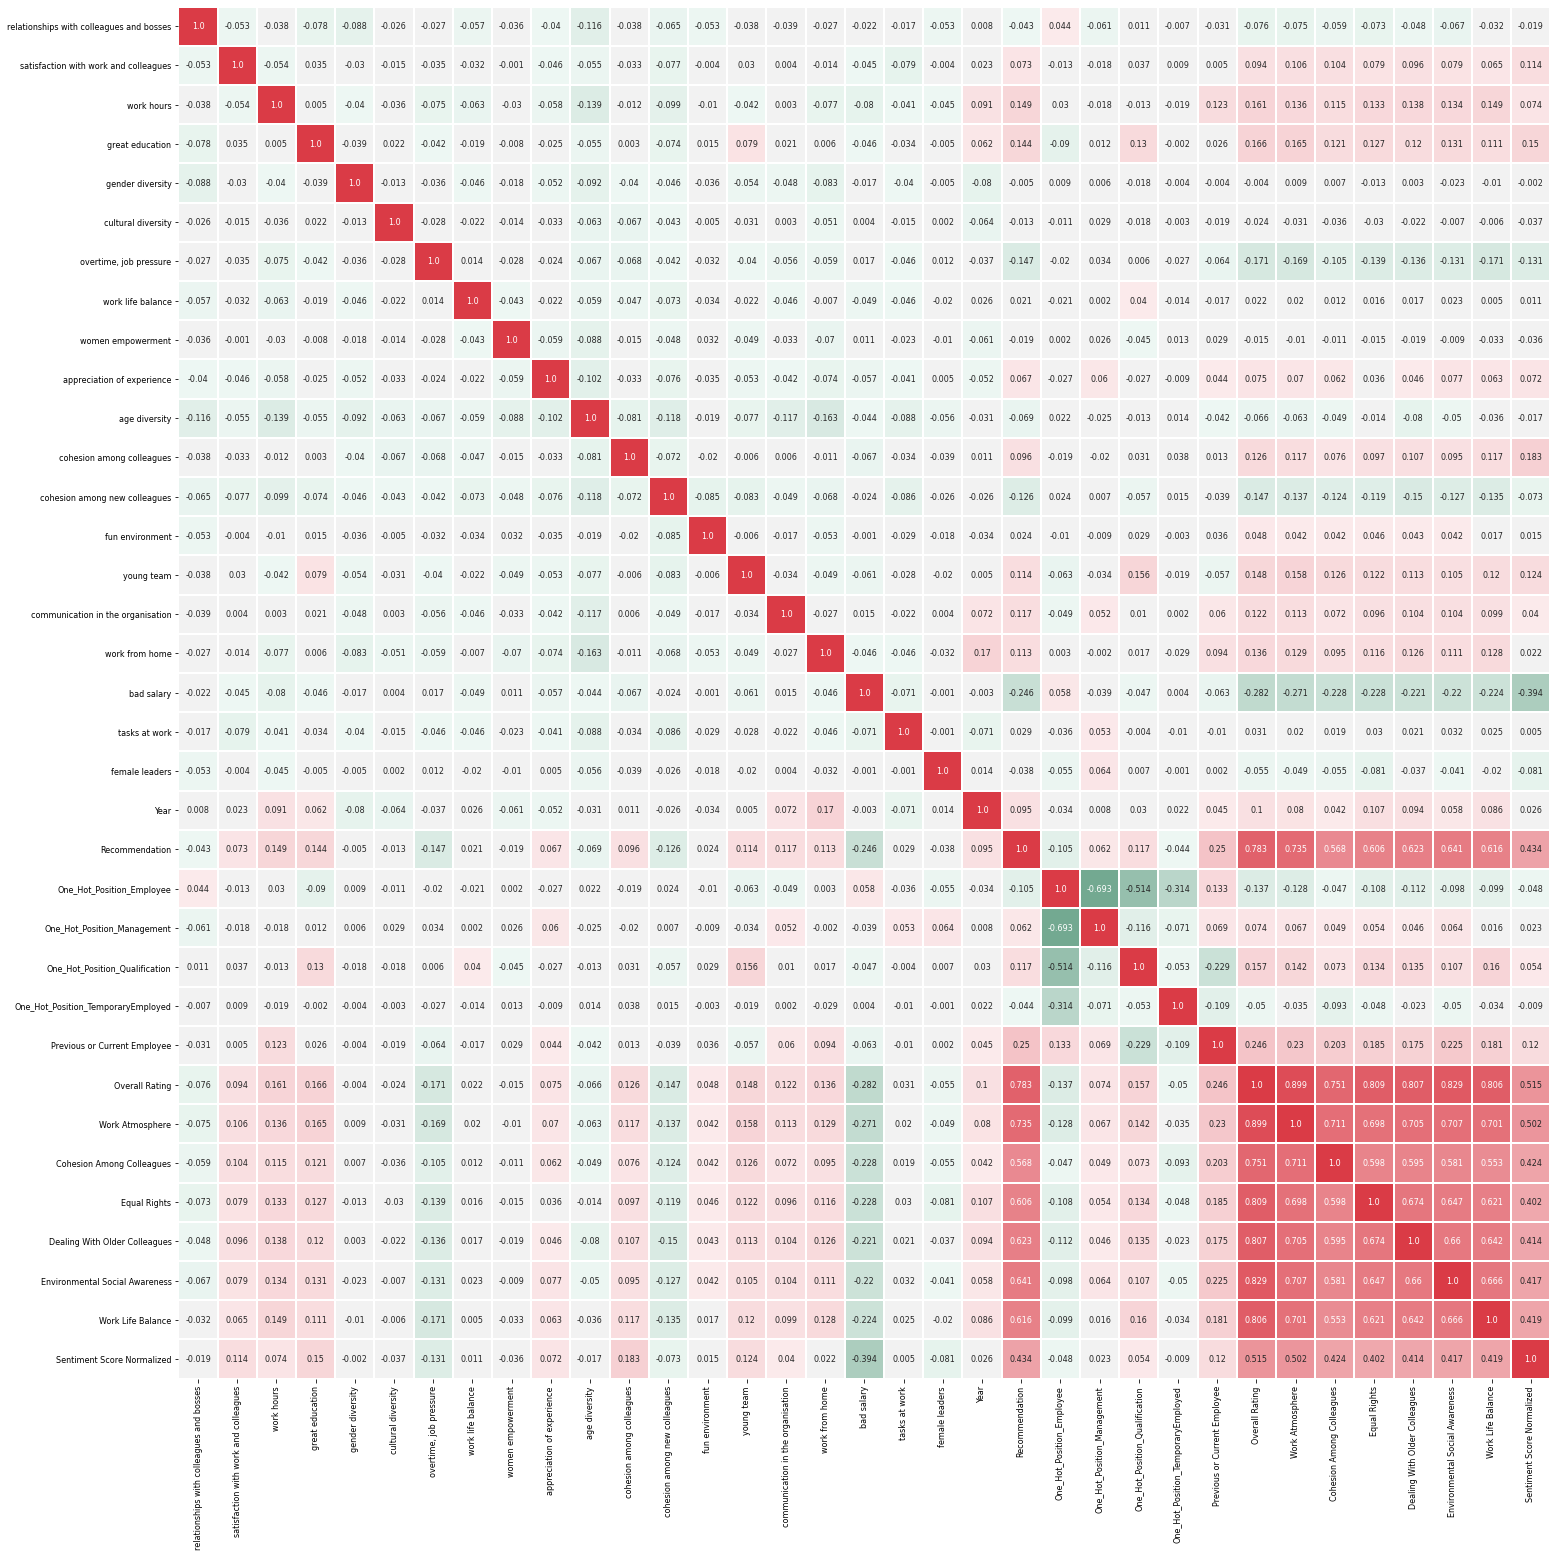

In [18]:
plt.rcParams.update({'font.size': 8})
fig = plt.figure(figsize=(55/2.54,55/2.54)) #dt2
#ax = fig.add_axes([0.25,0.45,0.75,0.55]) # left, bot, width, height
ax = fig.add_axes([0.12,0.12,0.88,0.88]) # left, bot, width, height
cmap = sns.diverging_palette(150, 10, as_cmap=True)
sns.heatmap(df_corr_result, cmap=cmap, linewidths=1, annot=df_corr_result, vmin=-1, vmax = 1 , cbar = False, square =False, annot_kws={"size": 8})
plt.savefig("dataOCM/Pearson_heatmap_DS"+str(dataset)+".jpeg")
